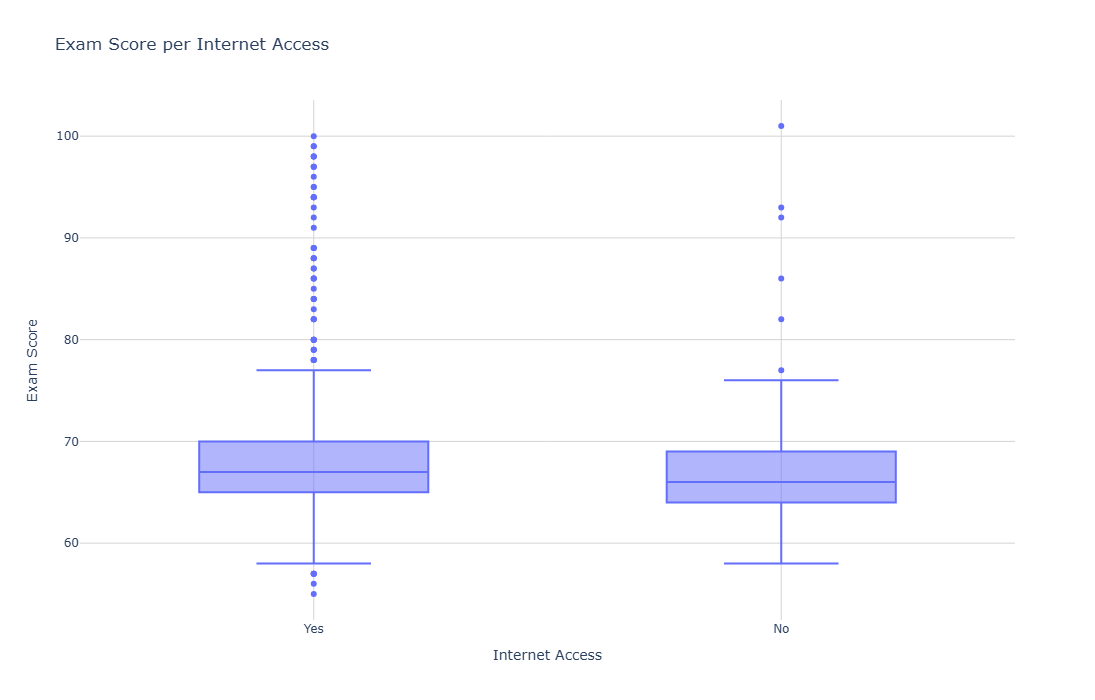

In [91]:
import pandas as pd
import plotly.express as px

# Laad de dataset in
df1 = pd.read_csv("StudentPerformanceFactors.csv")
df2 = pd.read_csv("gameandgrade.csv")
df3 = pd.read_csv("ResearchInformation3.csv")
# Maak de boxplot in Plotly
fig = px.box(
    df1,
    x="Internet_Access",
    y="Exam_Score",
    # points="all",  # toont alle individuele punten
    title="Exam Score per Internet Access"
)

# Layout aanpassen
fig.update_layout(
    width=800,   # Breedte in pixels
    height=700,  # Hoogte in pixels
    xaxis_title="Internet Access", 
    yaxis_title="Exam Score",
    plot_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor="lightgrey"),
    yaxis=dict(showgrid=True, gridcolor="lightgrey")
)

# Toon de interactieve plot
fig.show()


In [95]:
mean_scores = df1.groupby("Internet_Access")["Exam_Score"].mean()
print(mean_scores)


Internet_Access
No     66.535070
Yes    67.292895
Name: Exam_Score, dtype: float64


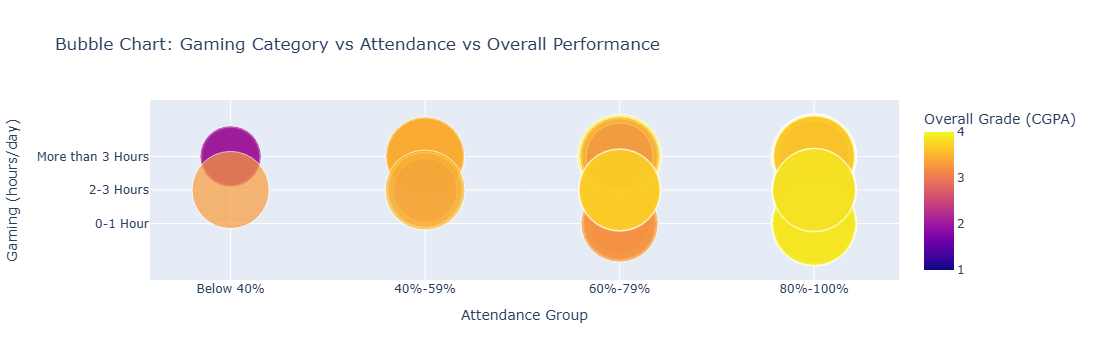

In [133]:
import pandas as pd
import plotly.express as px

# Laad de dataset
df = pd.read_csv("ResearchInformation3.csv")

# Filter relevante kolommen en verwijder missende waarden
df_clean = df[["Gaming", "Attendance", "Overall"]].dropna().copy()

# Omgekeerde logische volgorde voor 'Gaming' (hoogste bovenaan)
gaming_order = ["More than 3 Hours", "2-3 Hours", "0-1 Hour"]
df_clean = df_clean[df_clean["Gaming"].isin(gaming_order)]
df_clean["Gaming"] = pd.Categorical(df_clean["Gaming"], categories=gaming_order, ordered=True)

# Gewenste volgorde voor 'Attendance'
attendance_order = ["Below 40%", "40%-59%", "60%-79%", "80%-100%"]
df_clean = df_clean[df_clean["Attendance"].isin(attendance_order)]
df_clean["Attendance"] = pd.Categorical(df_clean["Attendance"], categories=attendance_order, ordered=True)

# Bubble chart aanmaken
fig = px.scatter(
    df_clean,
    x="Attendance",
    y="Gaming",
    size="Overall",
    color="Overall",
    title="Bubble Chart: Gaming Category vs Attendance vs Overall Performance",
    labels={
        "Attendance": "Attendance Group",
        "Gaming": "Gaming (hours/day)",
        "Overall": "Overall Grade (CGPA)"
    },
    category_orders={
        "Attendance": attendance_order,
        "Gaming": gaming_order
    },
    size_max=60,
    height= 600
)

fig.show()


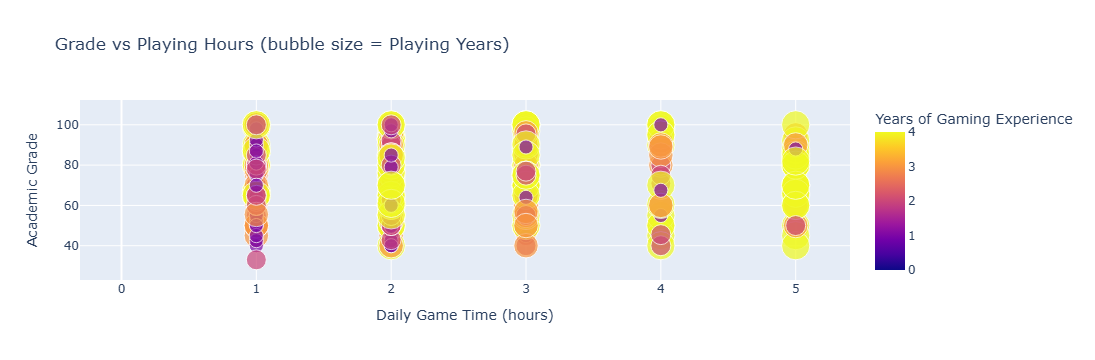

In [141]:
df3 = pd.read_csv("gameandgrade.csv")

df3_clean = df3[["Playing Hours", "Playing Years", "Grade"]].dropna()
df3_clean["Playing Hours"] = pd.to_numeric(df3_clean["Playing Hours"], errors="coerce")
df3_clean["Playing Years"] = pd.to_numeric(df3_clean["Playing Years"], errors="coerce")
df3_clean["Grade"] = pd.to_numeric(df3_clean["Grade"], errors="coerce")
df3_clean = df3_clean.dropna()

fig2 = px.scatter(
    df3_clean,
    x="Playing Hours",
    y="Grade",
    size="Playing Years",
    color="Playing Years",
    title="Grade vs Playing Hours (bubble size = Playing Years)",
    labels={
        "Playing Hours": "Daily Game Time (hours)",
        "Grade": "Academic Grade",
        "Playing Years": "Years of Gaming Experience"
    },
    size_max=20,
    height=800
)

fig2.show()


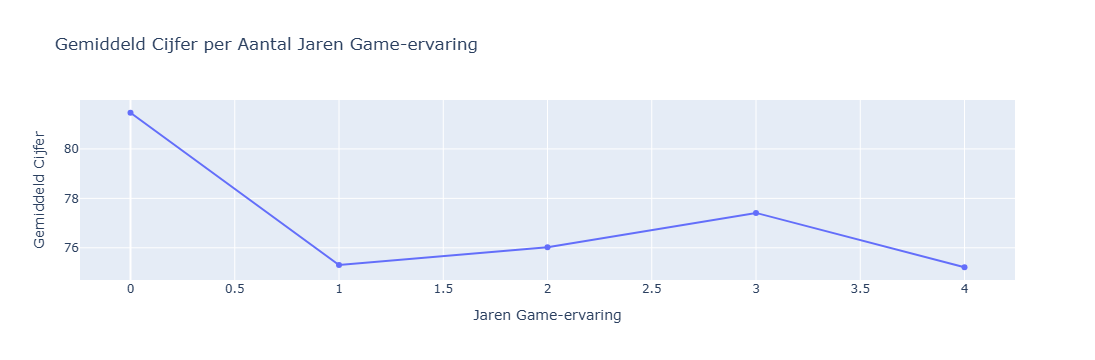

In [143]:
import pandas as pd
import plotly.express as px

# Dataset laden
df3 = pd.read_csv("gameandgrade.csv")

# Converteer naar numeriek
df3["Playing Years"] = pd.to_numeric(df3["Playing Years"], errors="coerce")
df3["Grade"] = pd.to_numeric(df3["Grade"], errors="coerce")

# Verwijder rijen met missende waarden
df3_clean = df3.dropna(subset=["Playing Years", "Grade"])

# Bereken gemiddeld cijfer per aantal jaren ervaring
avg_grade_by_years = df3_clean.groupby("Playing Years")["Grade"].mean().reset_index()

# Visualiseer
fig = px.line(
    avg_grade_by_years,
    x="Playing Years",
    y="Grade",
    markers=True,
    title="Gemiddeld Cijfer per Aantal Jaren Game-ervaring",
    labels={
        "Playing Years": "Jaren Game-ervaring",
        "Grade": "Gemiddeld Cijfer"
    }
)

fig.show()


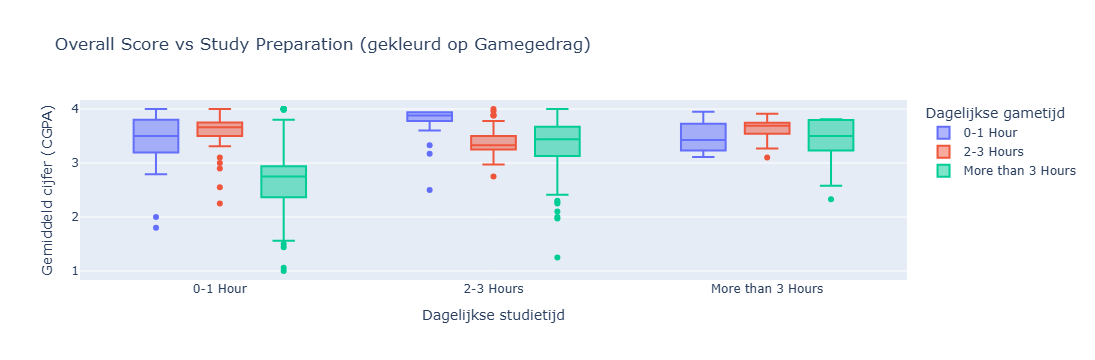

In [147]:
import pandas as pd
import plotly.express as px

# Laad dataset
df2 = pd.read_csv("ResearchInformation3.csv")

# Houd alleen relevante kolommen over
df2_clean = df2[["Preparation", "Gaming", "Overall"]].dropna().copy()

# Standaardiseer de ordinale categorieÃ«n
prep_order = ["0-1 Hour", "2-3 Hours", "More than 3 Hours"]
game_order = ["0-1 Hour", "2-3 Hours", "More than 3 Hours"]

df2_clean = df2_clean[df2_clean["Preparation"].isin(prep_order)]
df2_clean["Preparation"] = pd.Categorical(df2_clean["Preparation"], categories=prep_order, ordered=True)

df2_clean = df2_clean[df2_clean["Gaming"].isin(game_order)]
df2_clean["Gaming"] = pd.Categorical(df2_clean["Gaming"], categories=game_order, ordered=True)

# Maak de boxplot
fig = px.box(
    df2_clean,
    x="Preparation",
    y="Overall",
    color="Gaming",
    title="Overall Score vs Study Preparation (gekleurd op Gamegedrag)",
    labels={
        "Preparation": "Dagelijkse studietijd",
        "Overall": "Gemiddeld cijfer (CGPA)",
        "Gaming": "Dagelijkse gametijd"
    },
    category_orders={
        "Preparation": prep_order,
        "Gaming": game_order
    },
    height= 600
)

fig.show()
